<a href="https://colab.research.google.com/github/Jacob-Rose-BU/Alternative-Investments---Assette-Capstone-Project/blob/main/Fact_Sheet_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install graphviz -y
!wget https://sourceforge.net/projects/plantuml/files/plantuml.jar/download -O plantuml.jar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
--2025-07-18 16:15:16--  https://sourceforge.net/projects/plantuml/files/plantuml.jar/download
Resolving sourceforge.net (sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:d95, ...
Connecting to sourceforge.net (sourceforge.net)|104.18.12.149|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.sourceforge.net/project/plantuml/plantuml.jar?ts=gAAAAABoenMUvdGZTefVWgpVO14Wr71IHMigHOPivX1tbUjFTkhkJ_c4GAYd1rzH75bWQLZnOTzLSiavx4qNHicsBDxyCgK4eQ%3D%3D&use_mirror=pilotfiber&r= [following]
--2025-07-18 16:15:16--  https://downloads.sourceforge.net/project/plantuml/plantuml.jar?ts=gAAAAABoenMUvdGZTefVWgpVO14Wr71IHMigHOPivX1tbUjFTkhkJ_c4GAYd1rzH75bWQLZnOTzLSiavx4qNHicsBDxyCgK4eQ%3D%3D&use_mirror=pilotfiber&r=
Resolving 

In [ ]:
uml_code = """
@startuml

title ESG Equity Fact Sheet Pipeline (Updated)

' --- Country ESG Information ---
[Source: World Bank API (ESG Statistics Country Level)] --> [Load Data from World Bank API to DataFrame (python)]
[Load Data from World Bank API to DataFrame (python)] --> [Output: Snowflake (TDB)]
[Output: Snowflake (TDB)]--> [SQL in Snowflake (compute ESG score)]
[SQL in Snowflake (compute ESG score)] --> [Create COUNTRY_ESG_BENCHMARK]
[Create COUNTRY_ESG_BENCHMARK] --> [ESG Performance Benchmark for Country Grouped Securities]

' --- Securities & Performance Data ---
['Source: yfinance(Securities, Performance, ESG Statistics Securities Level)] --> [Load Data from API to DataFrame(python)]
[Load Data from API to DataFrame(python)] --> [Output: Snowflake (security_master, stock_performance_history, esg_stock_data)]
[Output: Snowflake (security_master, stock_performance_history, esg_stock_data)] --> [SQL in Snowflake (fund performance calculation, ESG Score Calculation)]
[SQL in Snowflake (fund performance calculation, ESG Score Calculation)] --> [Fund Performance, ESG Score Fund Level]


' --- Funds ---
[Source: Synthetic Funds (snowflake)] --> [Create Funds Holding Table]
[Create Funds Holding Table] --> [Fund Holdings Reference]

' --- HR Data ---
[Source: Synthetic HR Data (python)] --> [Output to Excel (HR)]
[Output to Excel (HR)] --> [Load HR into a DataFrame (python)]
[Load HR into a DataFrame (python)] --> [Use OpenAI to Generate Team Summary]
[Use OpenAI to Generate Team Summary] --> [Team Summary]

' --- Compliance Data ---
[Source: Synthetic Compliance Data (python)] --> [Output to Excel (Compliance)]
[Output to Excel (Compliance)] --> [Compliance Information and Footnotes]

' --- GPT Summary ---
[Source: OpenRouter API (Fund Summary)] --> [Load Data for OpenRouter API to DataFrame (python)]
[Load Data for OpenRouter API to DataFrame (python)] --> [Use OpenRouter to Generate Fund Narratives]
[Use OpenRouter to Generate Fund Narratives] --> [Output: CSV]
[Output: CSV] --> [Create FUND_PROFILE_NARRATIVES]
[Create FUND_PROFILE_NARRATIVES] --> [Push CSV narratives data to Snowflake FUND_PROFILE_NARRATIVES table]

' --- Fact Sheet Output ---
[ESG Performance Benchmark for Country Grouped Securities] --> [ESG Fact Sheet]
[Fund Performance, ESG Score Fund Level] --> [ESG Fact Sheet]
[Fund Holdings Reference] --> [ESG Fact Sheet]
[Team Summary] --> [ESG Fact Sheet]
[Compliance Information and Footnotes] --> [ESG Fact Sheet]
[Push CSV narratives data to Snowflake FUND_PROFILE_NARRATIVES table]--> [ESG Fact Sheet]

@enduml
"""

with open("pipeline_diagram.puml", "w") as file:
    file.write(uml_code)


In [ ]:
!java -jar plantuml.jar pipeline_diagram.puml


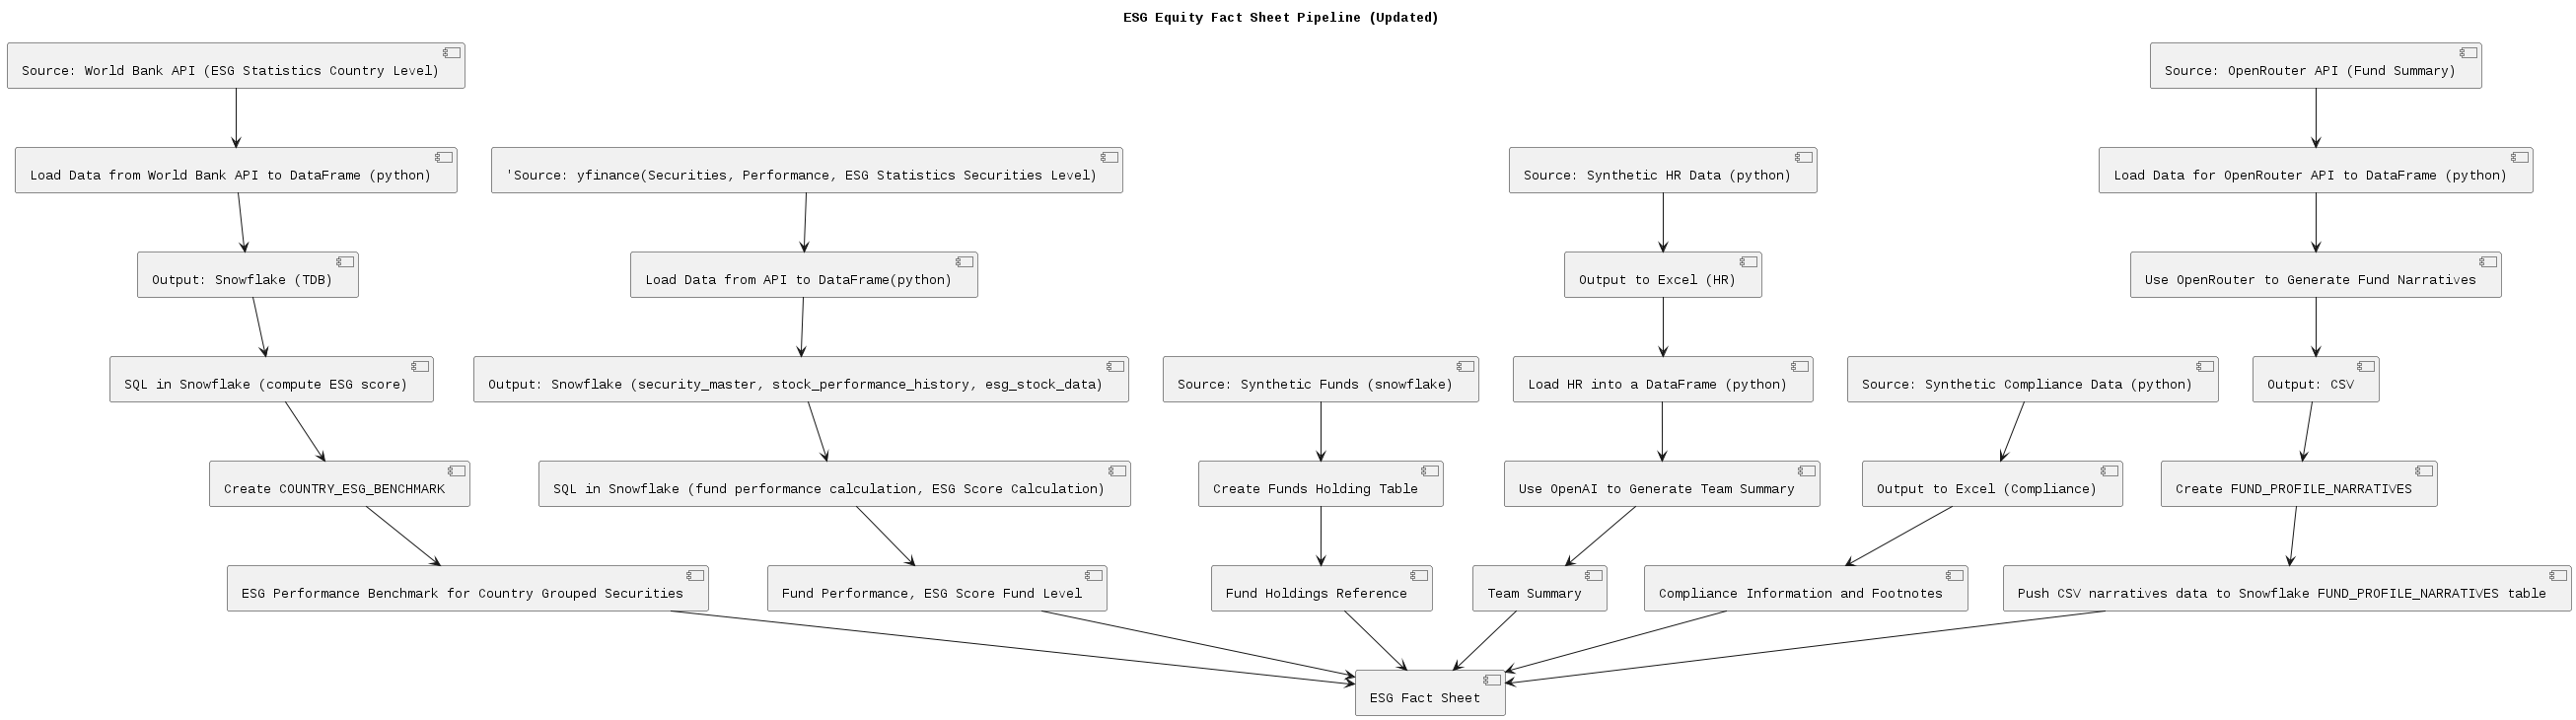

In [ ]:
from IPython.display import Image
Image(filename="pipeline_diagram.png")
# * indicates that it is completed

how does the data get to snowflake? dont think about it as data flow. i have holdings table, what do i need to do to query for it? holdings have securities and portolio weights. with specific weights and account

we are missing data - what data (other than benchmark?)

if you look at the first 3 lines of any fact sheet, you need account and currency. dont have currency who are you selling to. when you wuery into yahoo finance, we are asumming its in USD, but rn its hard coded in original scripts, so need to have it pulled somewhere. look at your original fact sheet- it has regional breakouts and we have info from world factbook but how are we getting the information? we are explicitly putting united states. take. alook at fact sheet, what are we missing from there.
world bank api - pulling country -
dont do things in memory ( what is this) calling out to api each time . you need to rest this somewhere.
when you get info from factbook without context its meaningless. how are we connecting united states
countries based on holdings, where is the country


The diagram then illustrates how all data flows into a central Python pipeline that generates the final Fact Sheet output. The result is a clear, top-down visual representation of the data integration and reporting process.